In [7]:
import os
%pwd  # this tell us which path we are currently working , so based on the below output path we are working under the research file
os.chdir("C:\datascience End to End Projects\End-to-End-Heart-Disease-Application-")  #  but i would like to work with main ProjectML_with_MLFlow file , so for getting i step back in path inorder to enter the main project file i used this command os.chdir("../")
%pwd

'C:\\datascience End to End Projects\\End-to-End-Heart-Disease-Application-'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')


In [62]:
import pandas  as pd
data=pd.read_csv("artifacts\data_ingestion\Heart_csv\heart.csv") # this path i got it from the config.yaml file  from the data_validation unzip_data_dir varaible 
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [72]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0


In [63]:
data.shape

(918, 12)

In [64]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


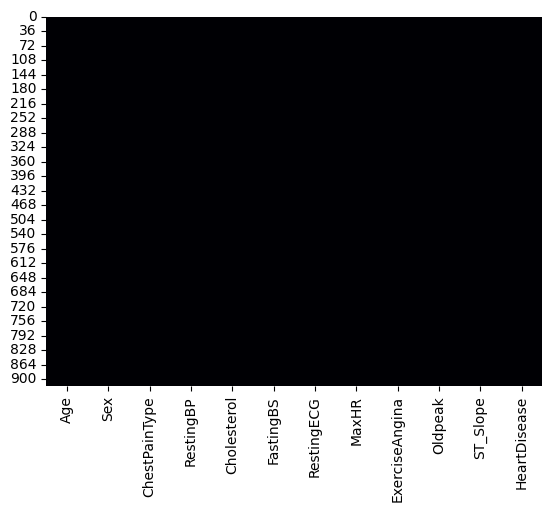

In [66]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

No null values present in the data!

In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


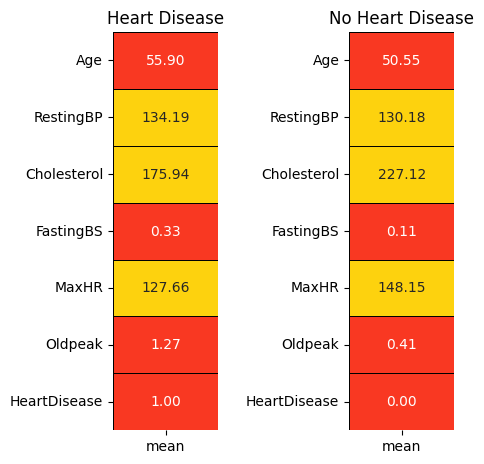

In [68]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

Mean values of all the features for cases of heart diseases and non-heart diseases.

### Exploratory Data Analysis

##### Dividing features into Numerical and Categorical :

In [69]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [73]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


- Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
- Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.
- Eg : datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

For this dataset, as the number of features are less, we can manually check the dataset as well.

#### Categorical Features

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

- Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

#### Distribution of Categorical Features 

In [71]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0


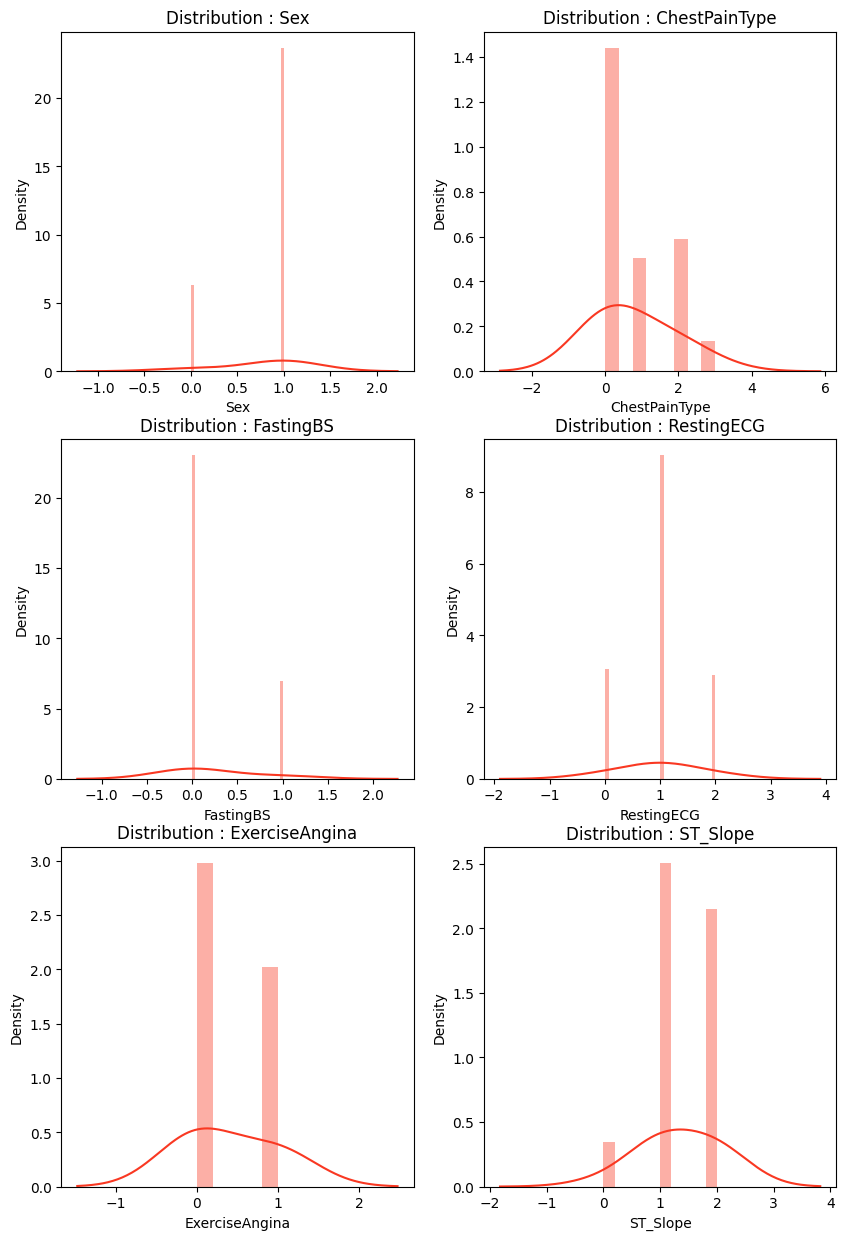

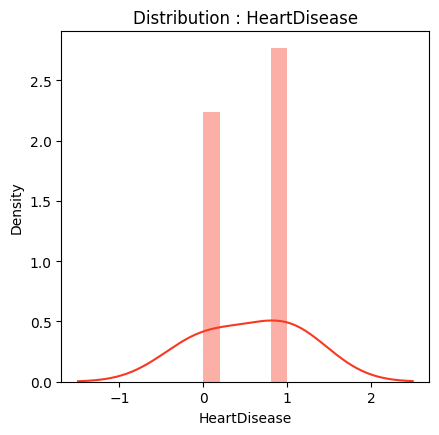

In [28]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

In [74]:
df1[categorical_features].head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,1,1,0,1,0,2,0
1,0,2,0,1,0,1,1
2,1,1,0,2,0,2,0
3,0,0,0,1,1,1,1
4,1,2,0,1,0,2,0


All the categorical features are near about Normally Distributed.

#### Numerical Features :
##### Distribution of Numerical Features :¶

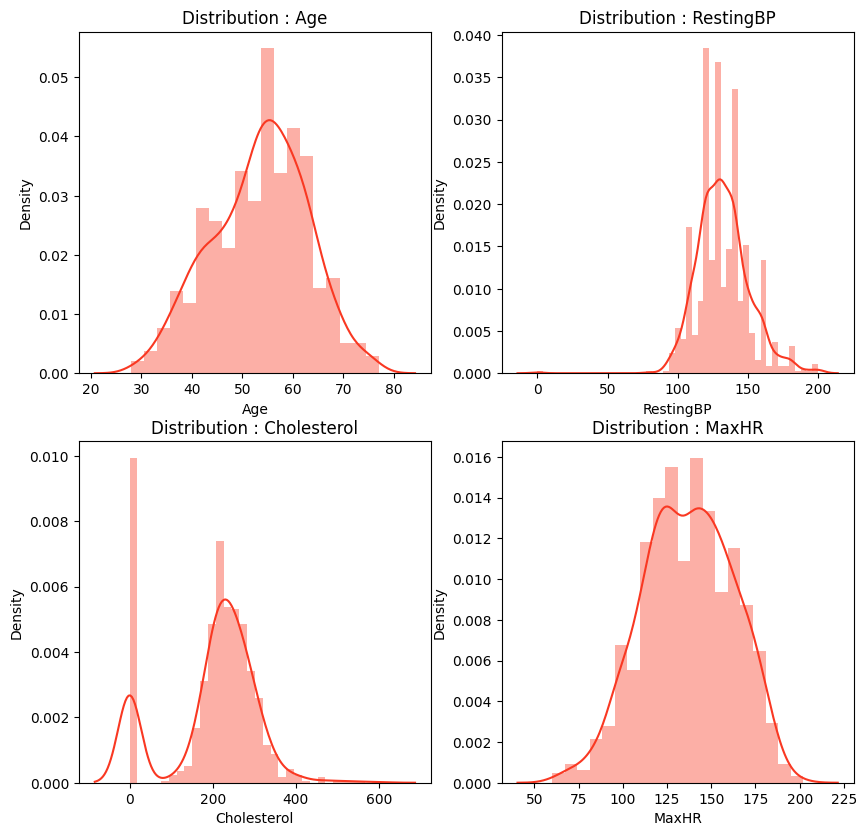

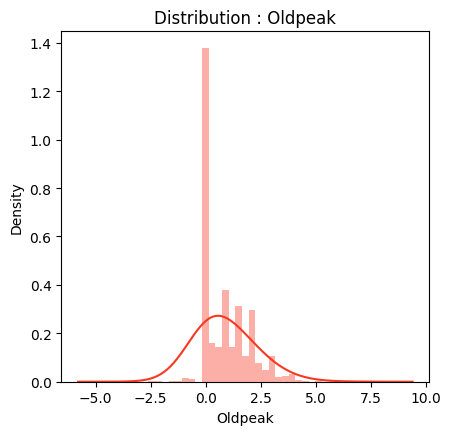

In [29]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

- Oldpeak's data distribution is rightly skewed.
- Cholestrol has a bidmodal data distribution.

#### Target Variable Visualization (HeartDisease) 

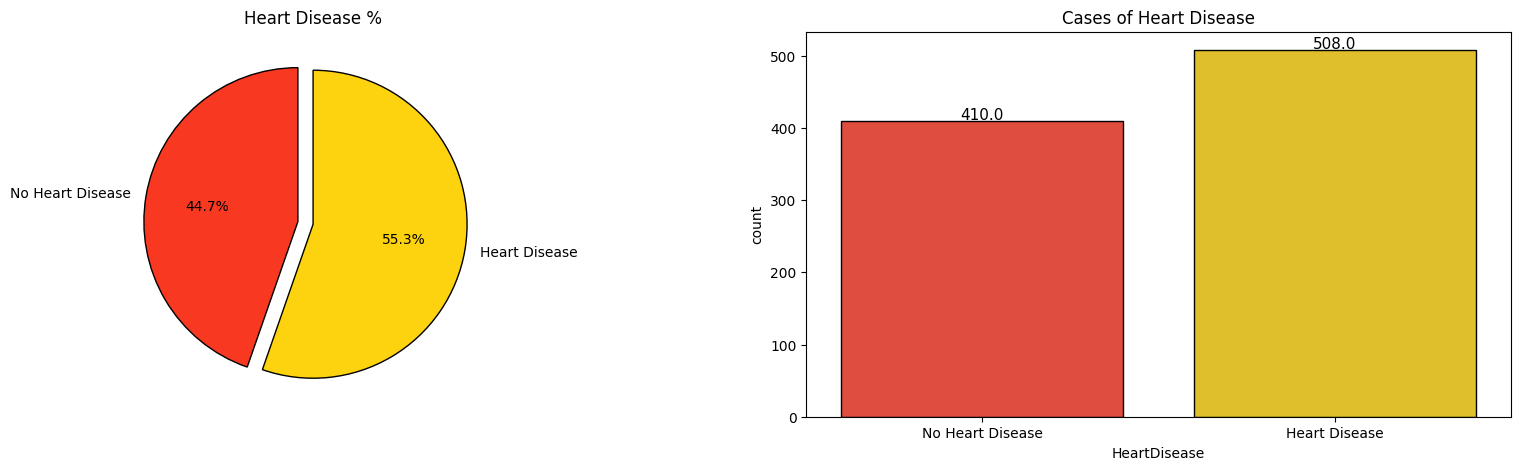

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')
plt.show()


The dataset is pretty much evenly balanced!

#### Categorical Features vs Target Variable (HeartDisease) :

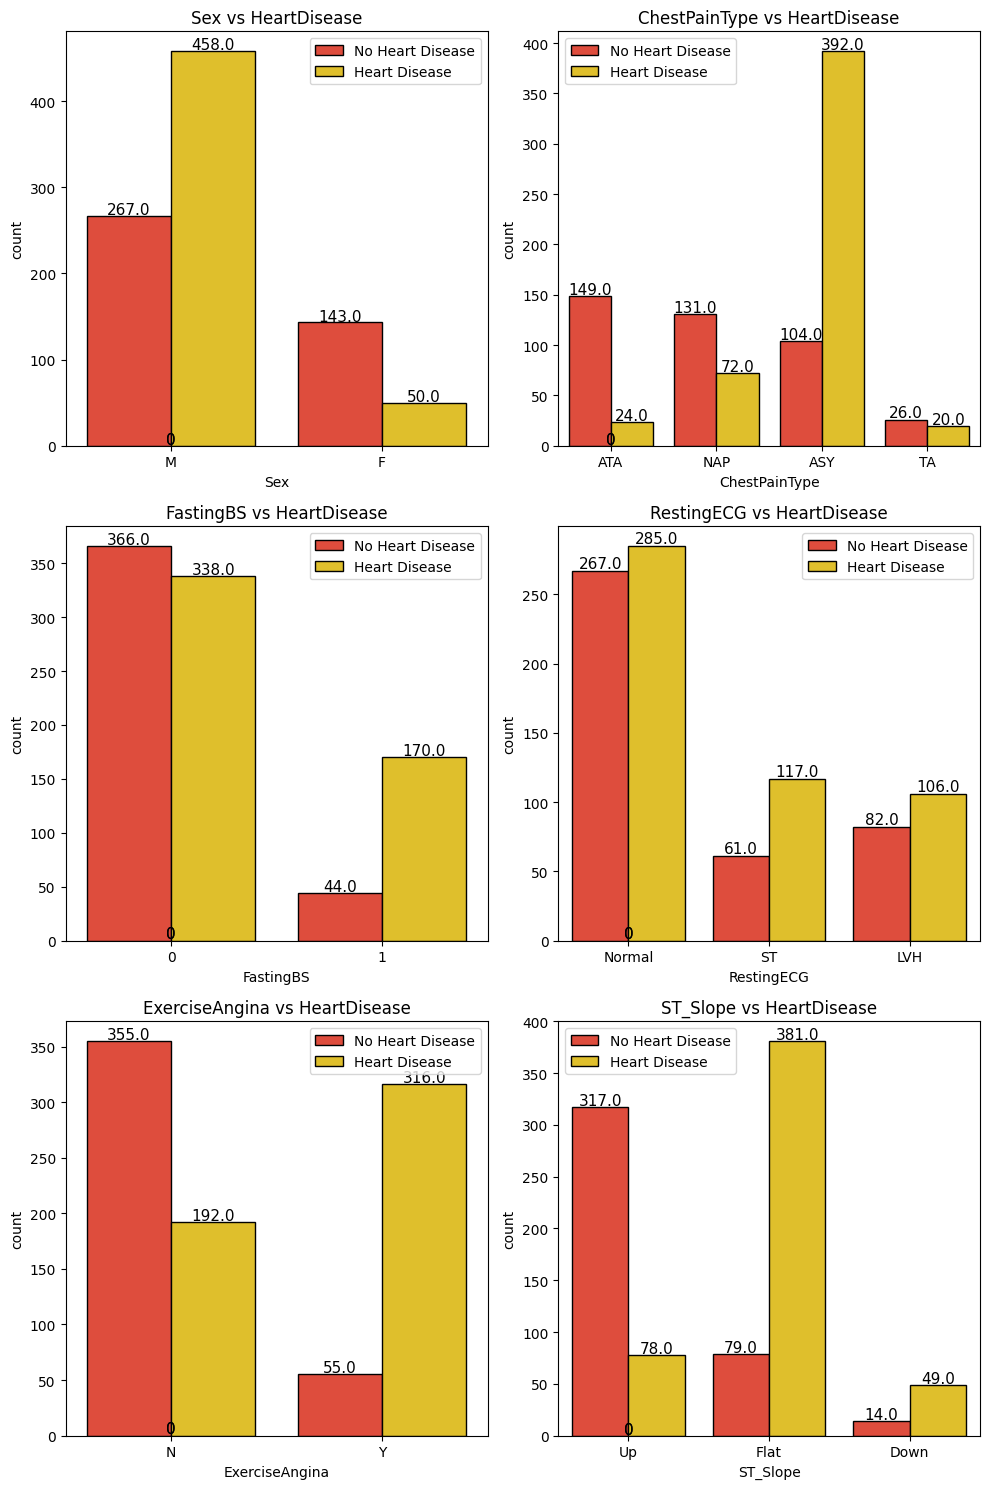

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
for i in range(len(categorical_features) - 1):
    sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax[i // 2, i % 2])
    for rect in ax[i // 2, i % 2].patches:
        ax[i // 2, i % 2].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    title = categorical_features[i] + ' vs HeartDisease'
    ax[i // 2, i % 2].legend(['No Heart Disease', 'Heart Disease'])
    ax[i // 2, i % 2].set_title(title)

plt.tight_layout()
plt.show()


- Male population has more heart disease patients than no heart disease patients. In the case of Female population, heart disease patients are less than no heart disease patients.
- ASY type of chest pain boldly points towards major chances of heart disease.
- Fasting Blood Sugar is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients.
- RestingECG does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.
- Exercise Induced Engina definitely bumps the probability of being diagnosed with heart diseases.
- With the ST_Slope values, flat slope displays a very high probability of being diagnosed with heart disease. Down also shows the same output but in very few data points.

#### Categorical Features vs Positive Heart Disease Cases :

In [37]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

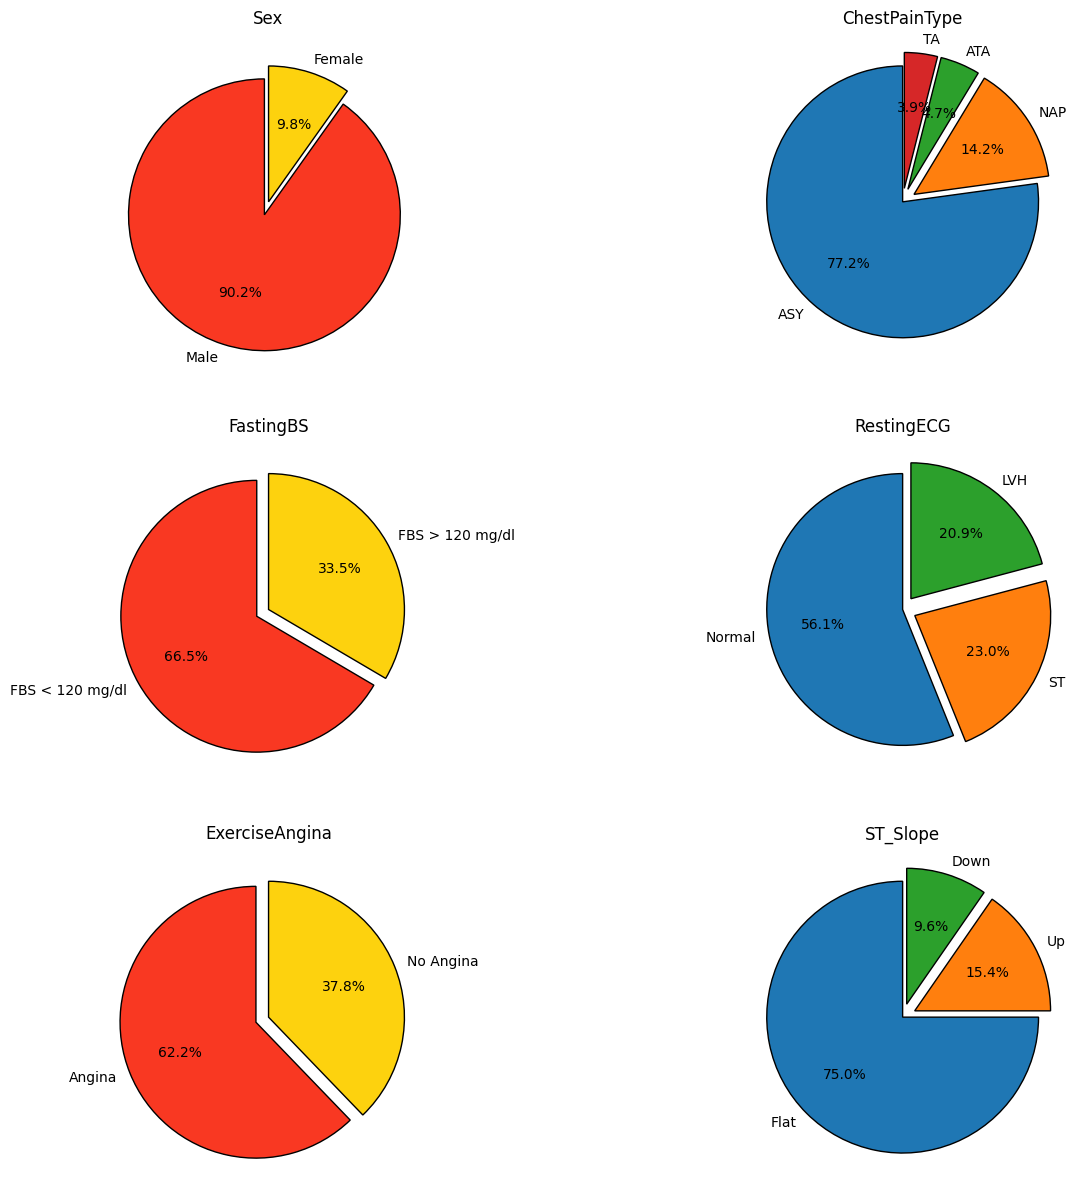

In [38]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

- Out of all the heart disease patients, a staggering 90% patients are male.
- When it comes to the type of chest pain, ASY type holds the majority with 77% that lead to heart diseases.
- Fasting Blood Sugar level < 120 mg/dl displays high chances of heart diseases.
- For RestingECG, Normal level accounts for 56% chances of heart diseases than LVH and ST levels.
- Detection of Exercise Induced Angina also points towards heart diseases.
- When it comes to ST_Slope readings, Flat level holds a massive chunk with 75% that may assist in detecting underlying heart problems.

#### Numerical Features vs Target Variable (HeartDisease) :

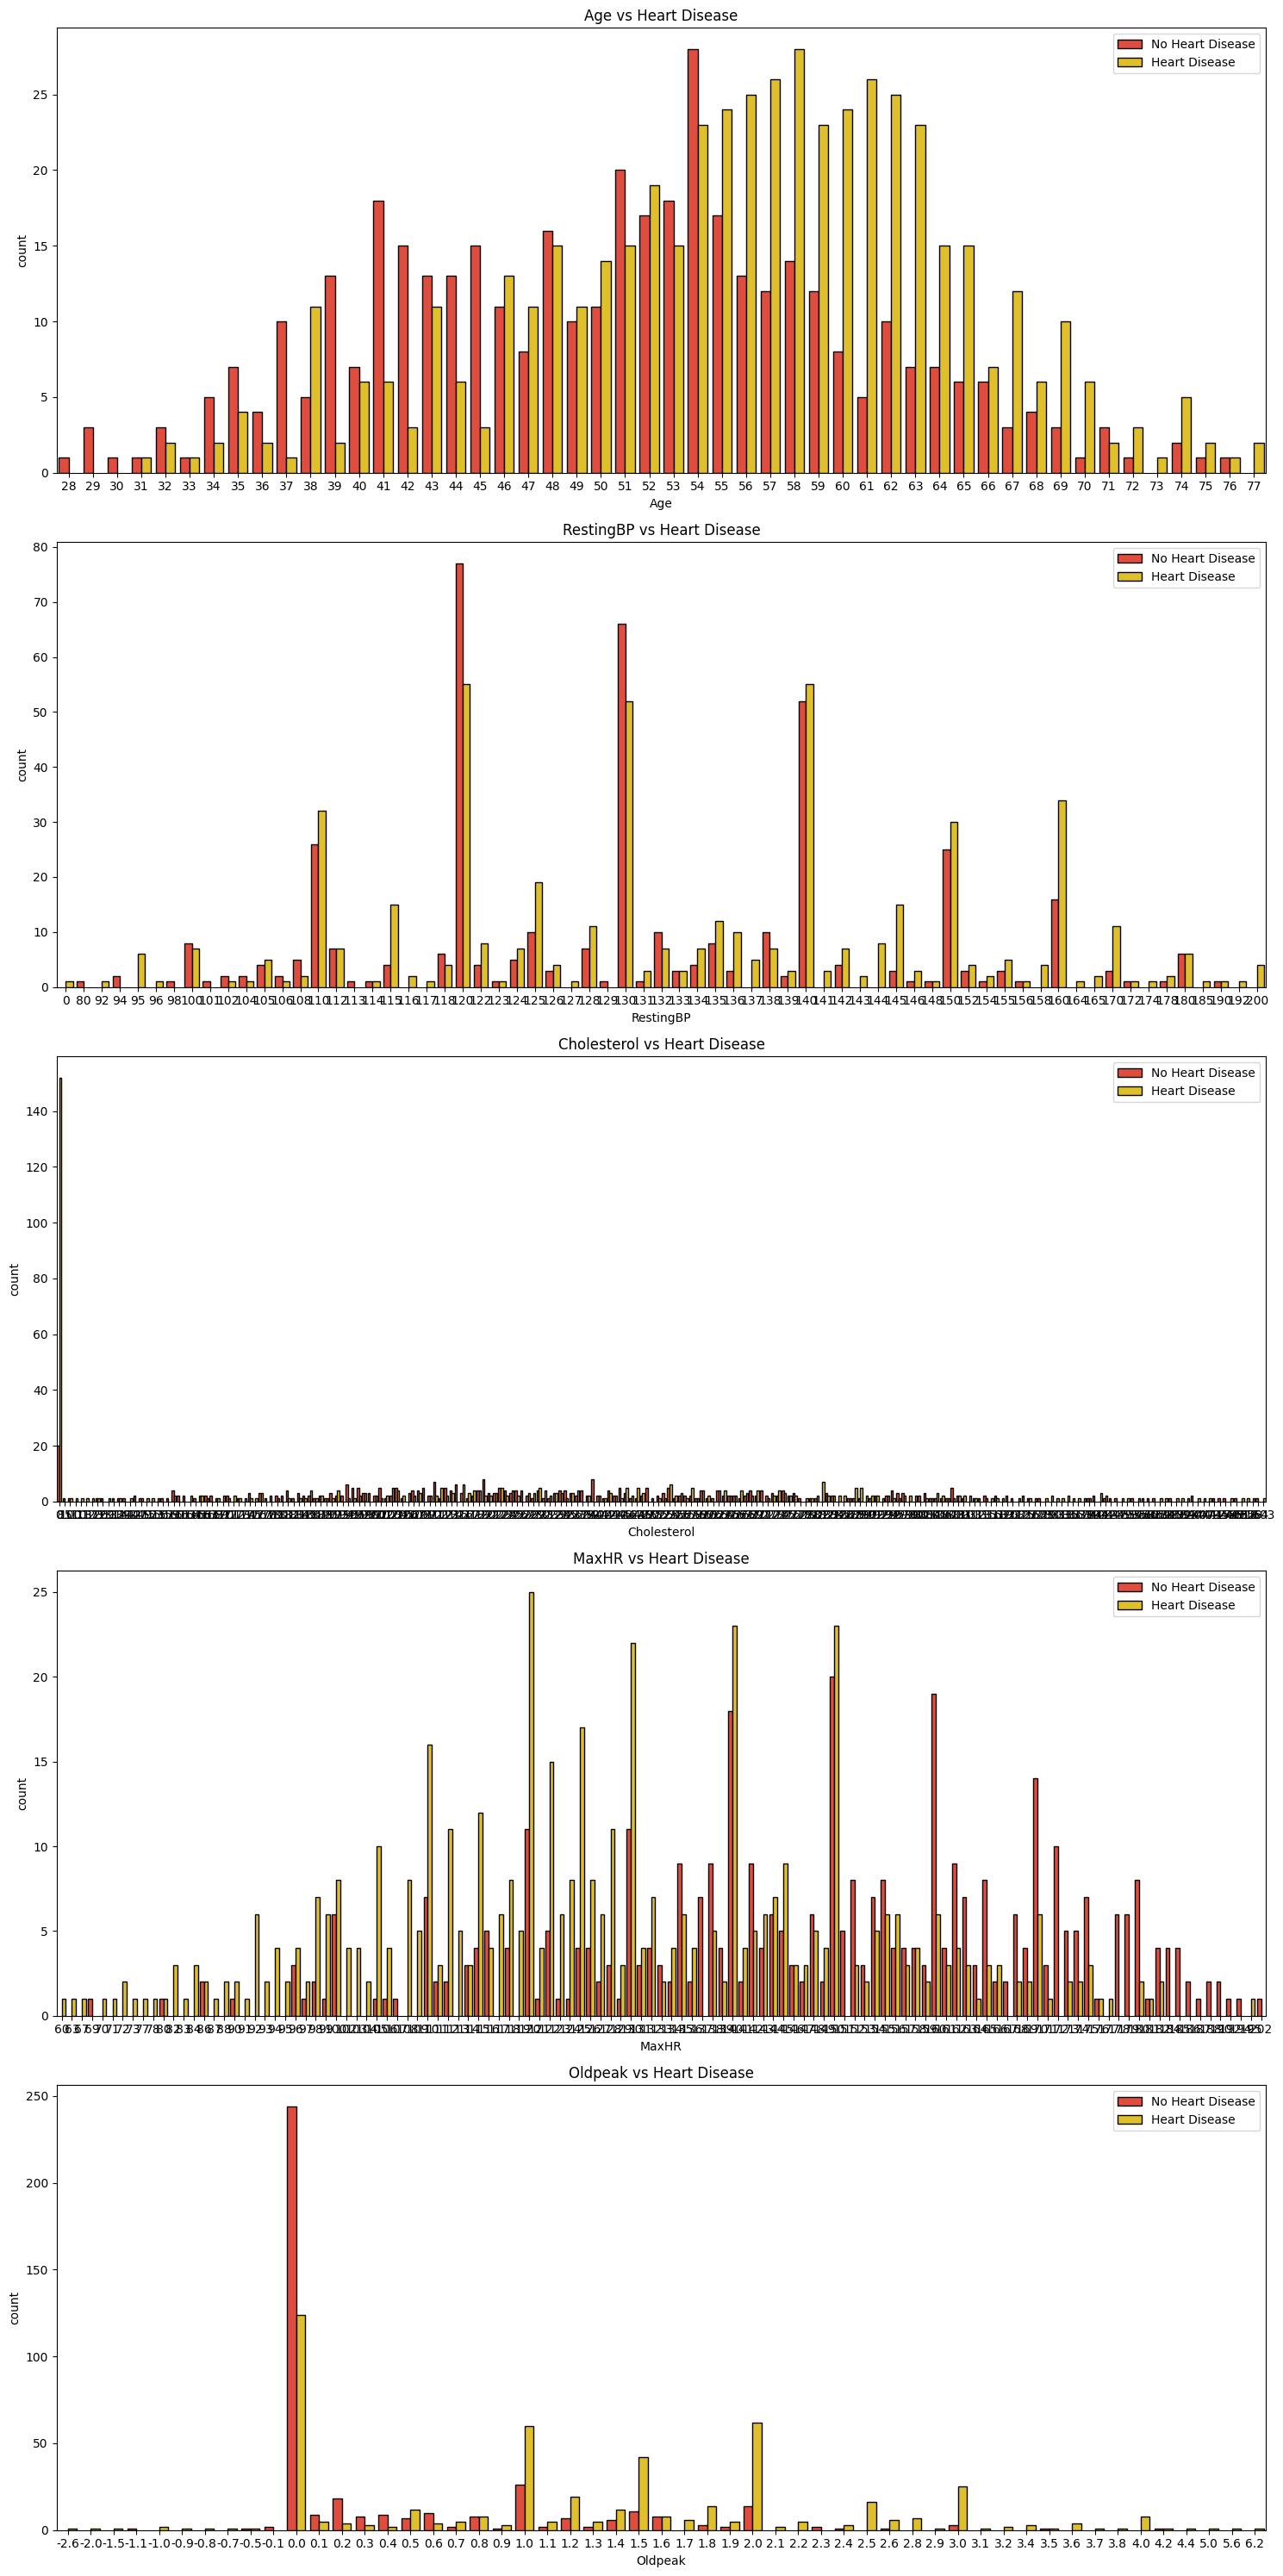

In [42]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))
for i in range(len(numerical_features)):
    sns.countplot(x=numerical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax[i])
    title = numerical_features[i] + ' vs Heart Disease'
    ax[i].legend(['No Heart Disease', 'Heart Disease'])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()


- Because of too many unique data points in the above features, it is difficult to gain any type of insight. Thus, we will convert these numerical features,except age, into categorical features for understandable visualization and gaining insights purposes.
- Thus, we scale the individual values of these features. This brings the varied data points to a constant value that represents a range of values.
- Here, we divide the data points of the numerical features by 5 or 10 and assign its quotient value as the representative constant for that data point. The scaling constants of 5 & 10 are decided by looking into the data & intuition.

In [43]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]

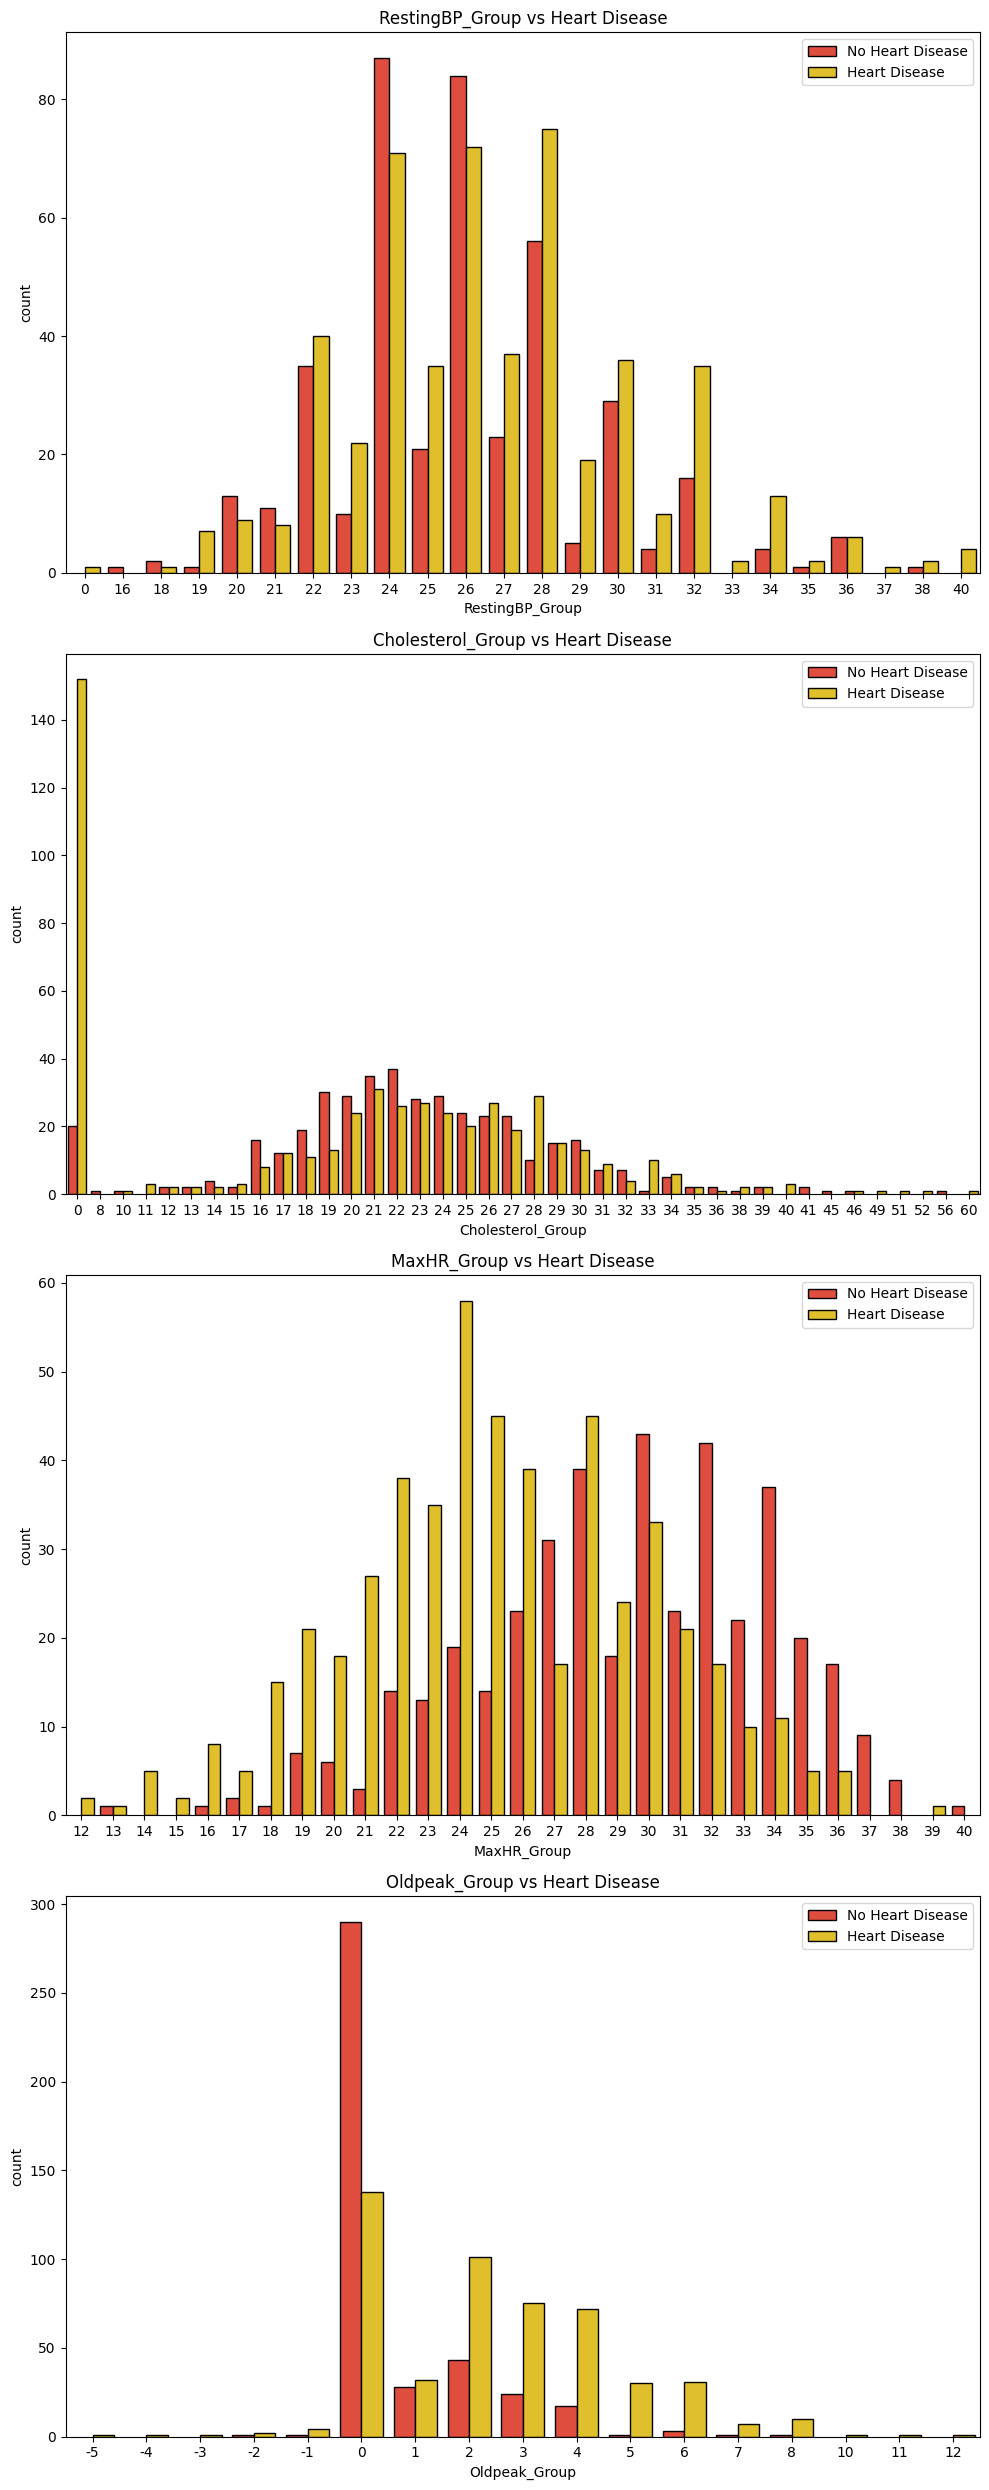

In [45]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    sns.countplot(x=group_numerical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax[i])
    ax[i].legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    ax[i].set_title(title)

plt.tight_layout()
plt.show()


- From the RestingBP group data, 95 (19x5) - 170 (34x5) readings are most prone to be detected with heart diseases.
- Cholesterol levels between 160 (16x10) - 340 (34x10) are highly susceptible to heart diseases.
- For the MaxHR readings, heart diseases are found throughout the data but 70 (14x5) - 180 (36x5) values has detected many cases.
- Oldpeak values also display heart diseases throughout. 0 (0x5/10) - 4 (8x5/10) slope values display high probability to be diagnosed with heart diseases.

#### Numerical features vs Categorical features w.r.t Target variable(HeartDisease) :
Sex vs Numerical Features :

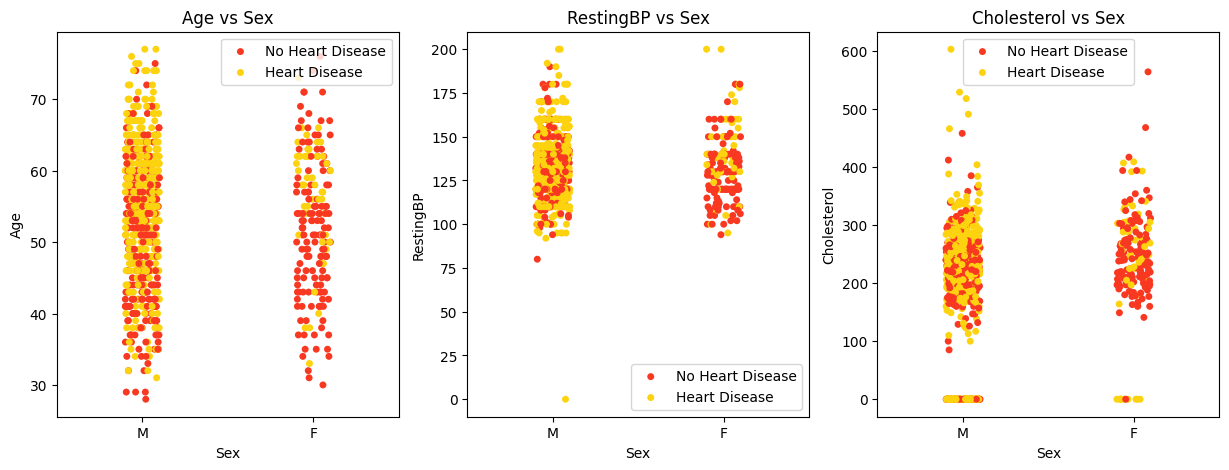

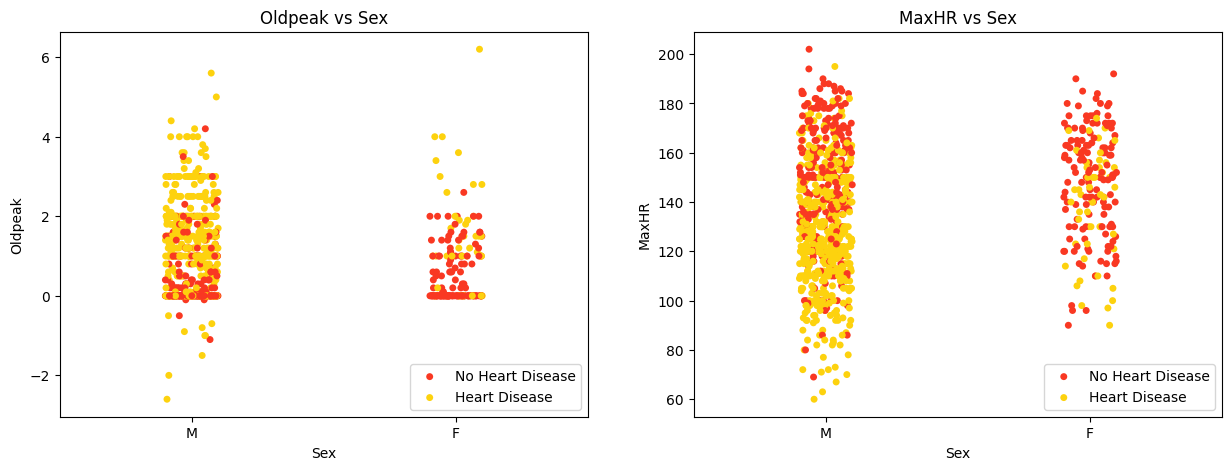

In [47]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

- Male population displays heart diseases at near about all the values of the numerical features. Above the age of 50, positive old peak values and maximum heart rate below 140, heart diseases in male population become dense.
- Female population data points are very less as compared to male population data points. Hence, we cannot point to specific ranges or values that display cases of heart diseases.

#### ChestPainType vs Numerical Features :

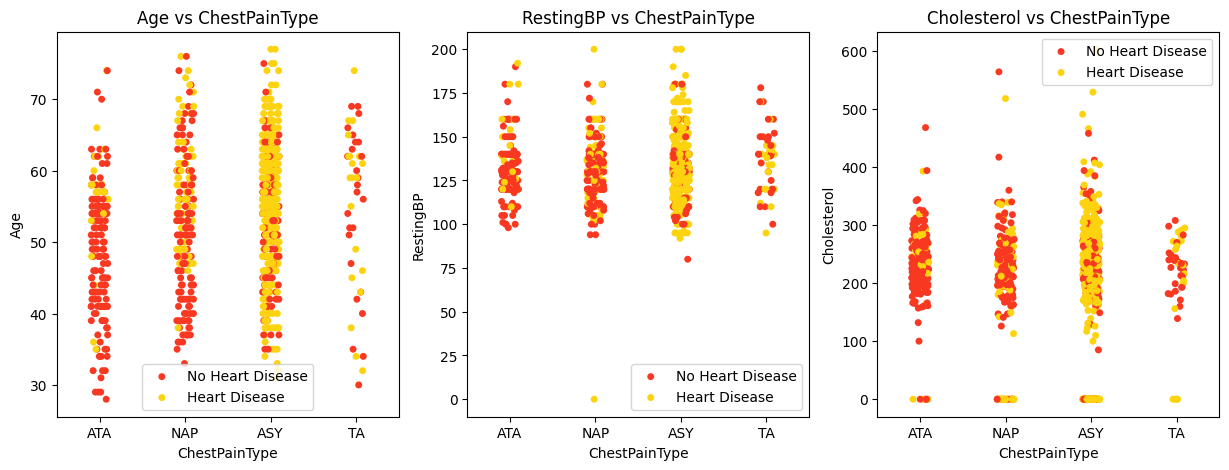

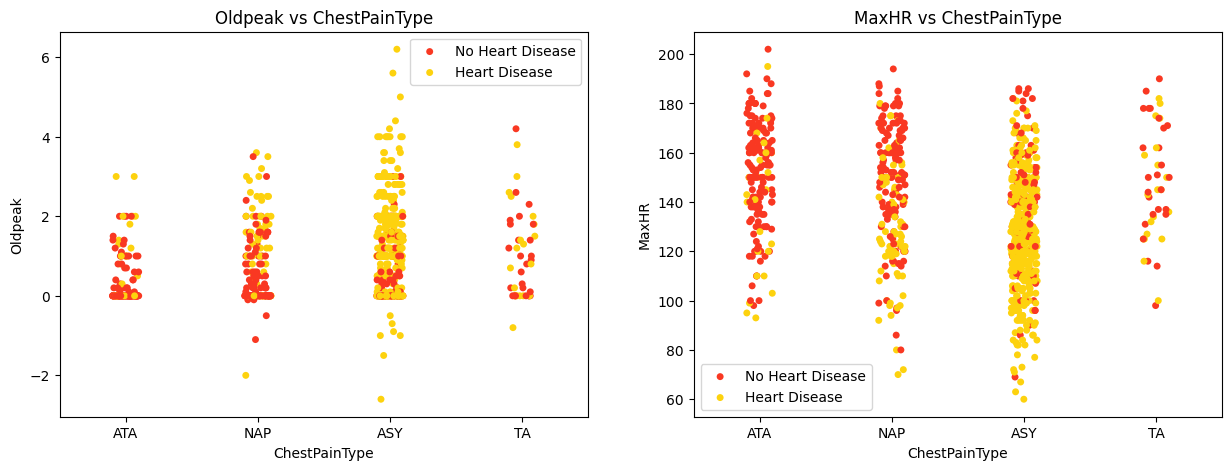

In [48]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title);

- ASY type of chest pain dominates other types of chest pain in all the numerical features by a lot.

### FastingBS vs Numerical features :

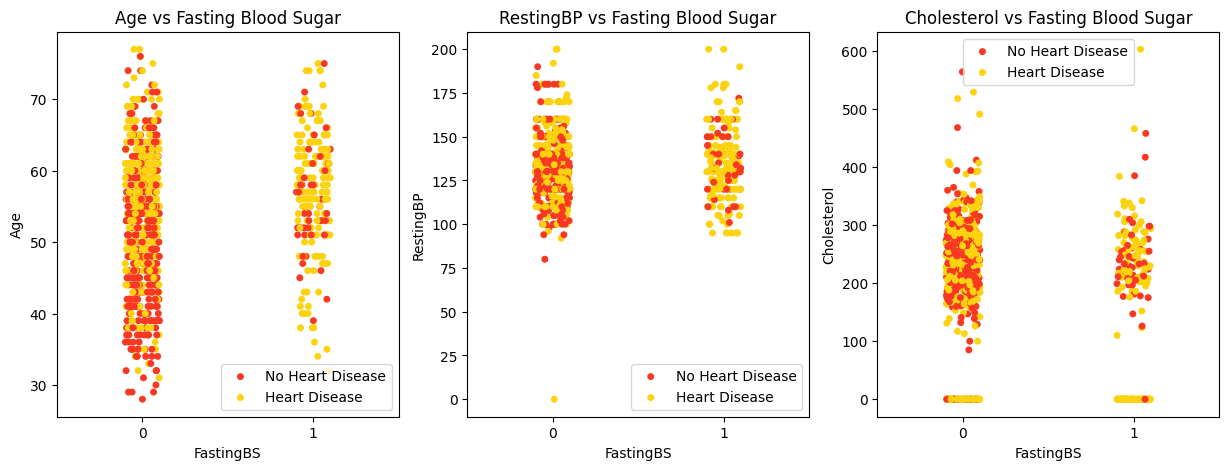

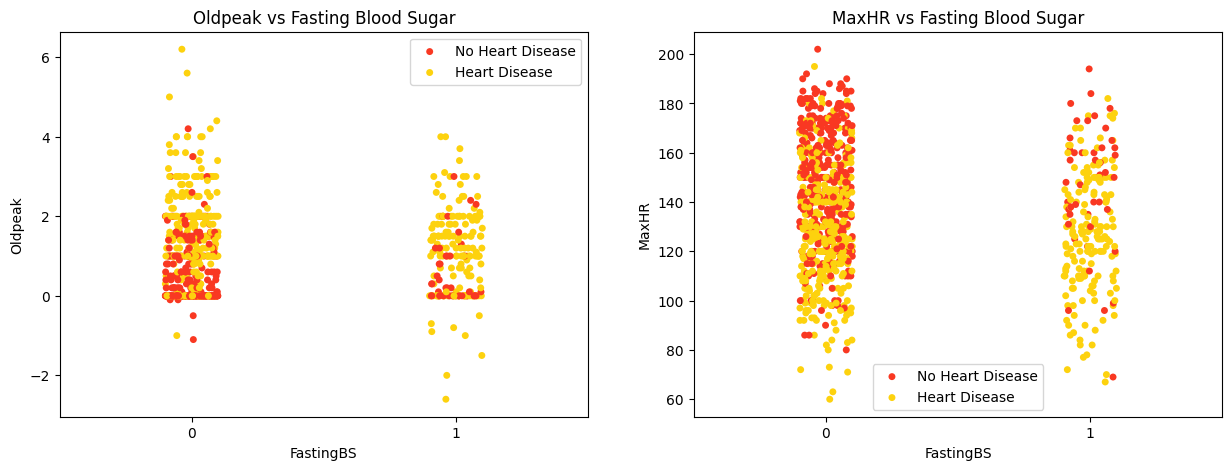

In [49]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);


- Above the age 50, heart diseases are found throughout the data irrespective of the patient being diagnosed with Fasting Blood Sugar or not.
- Fasting Blood Sugar with Resting BP over 100 has displayed more cases of heart diseases than patients with no fasting blood sugar.
- Cholesterol with Fasting Blood Sugar does not seem to have an effect in understanding reason behind heart diseases.
- Patients that have not been found positive with Fasting Blood Sugar but have maximum heart rate below 130 are more prone to heart diseases.

#### RestingECG vs Numerical Features :

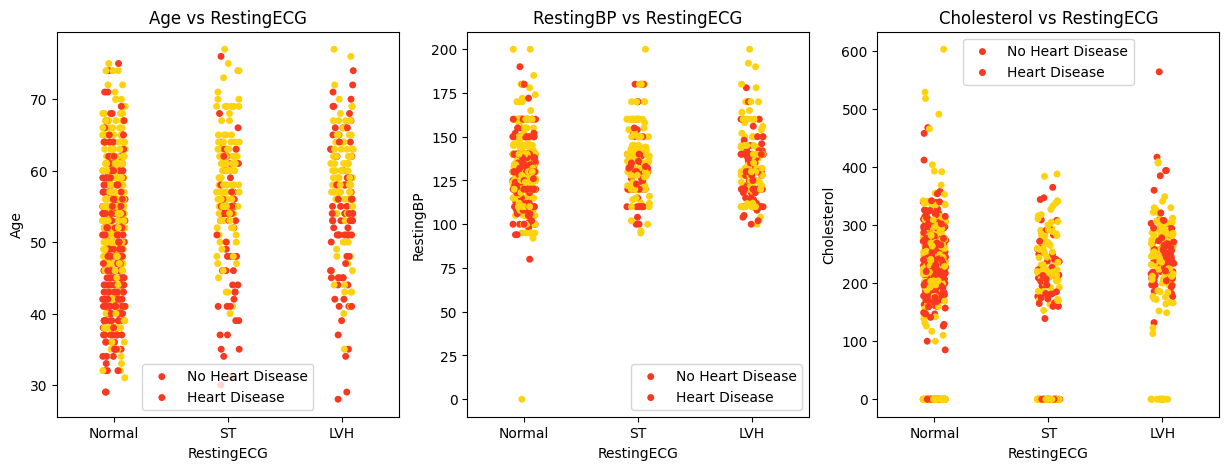

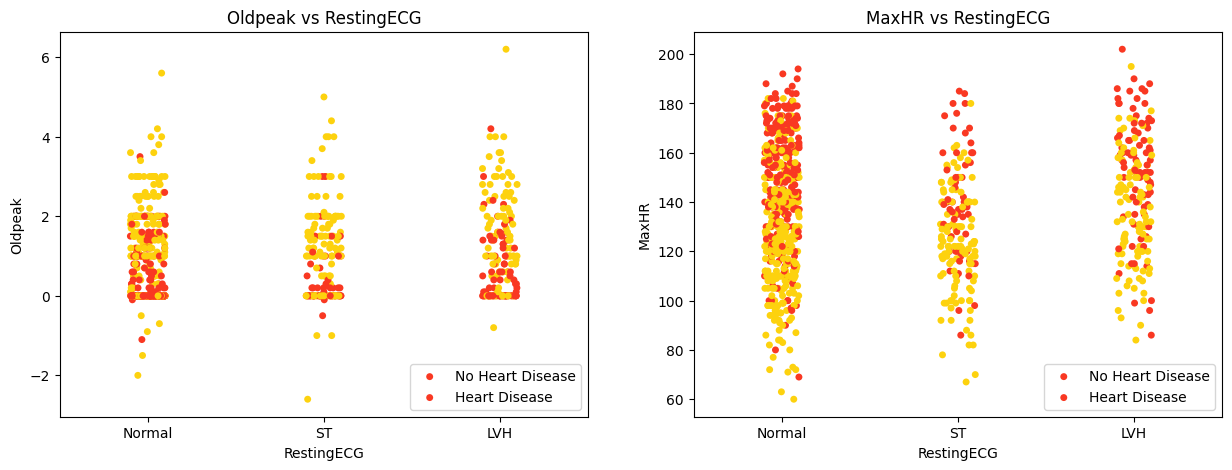

In [51]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);


- Heart diseases with RestingECG values of Normal, ST and LVH are detected starting from 30,40 & 40 respectively. Patients above the age of 50 are more prone than anyother ages irrespective of RestingECG values.
- Heart diseases are found consistently throughout any values of RestingBP and RestingECG.
- Cholesterol values between 200 - 300 coupled with ST value of RestingECG display a patch of patients suffering from heart diseases.
- For maximum Heart Rate values, heart diseases are detected in dense below 140 points and Normal RestingECG. ST & LVH throughout the maximum heart rate values display heart disease cases.
#### ExerciseAngina vs Numerical Features :

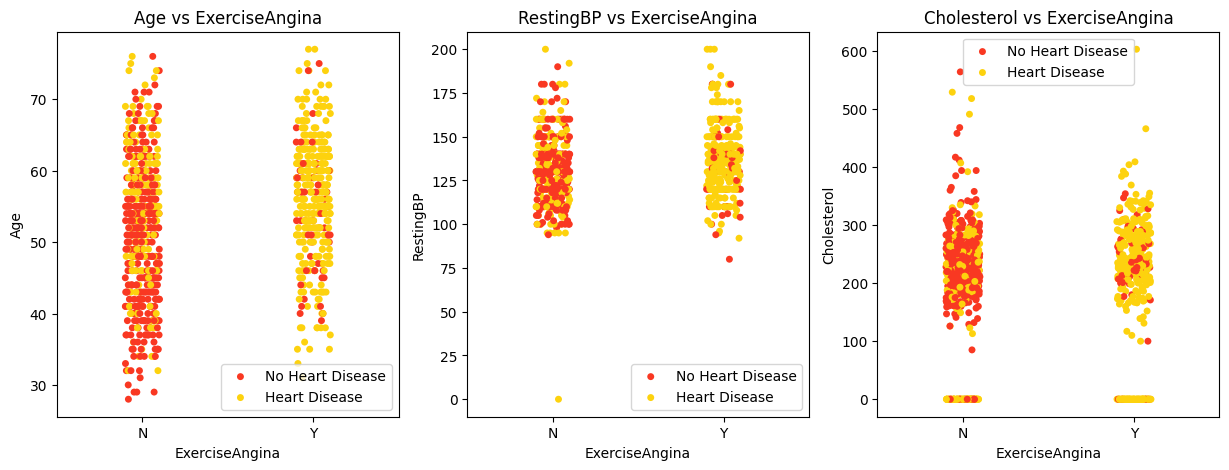

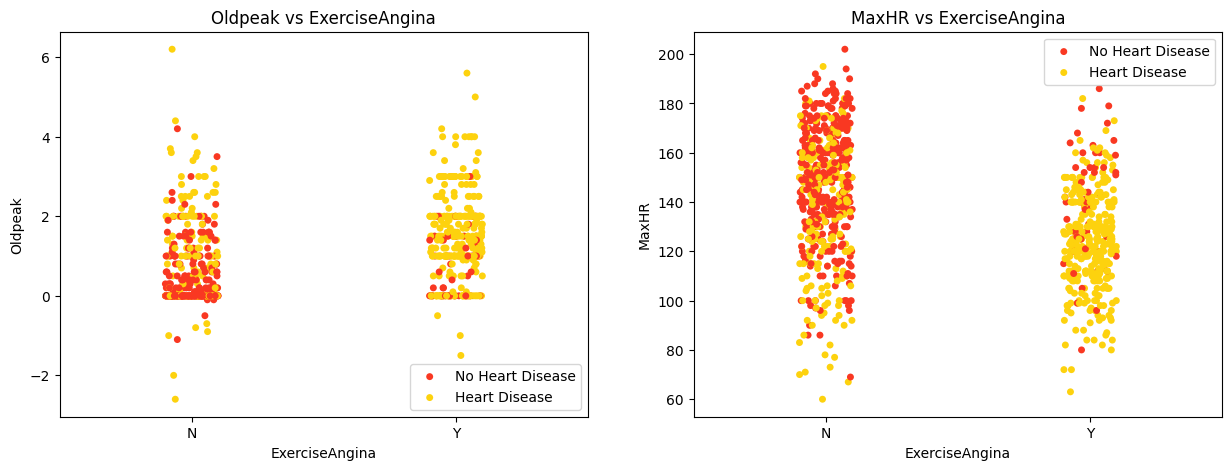

In [52]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina' 
    plt.title(title);

- A crsytal clear observation can be made about the relationship between heart disease case and Exercise induced Angina. A positive correlation between the 2 features can be concluded throughout all the numerical features.

#### ST_Slope vs Numerical Features :

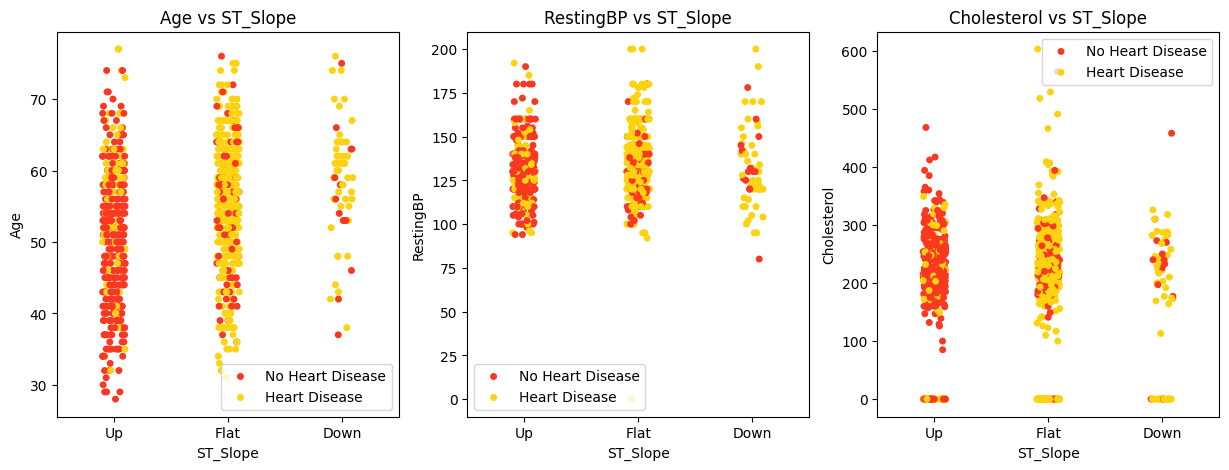

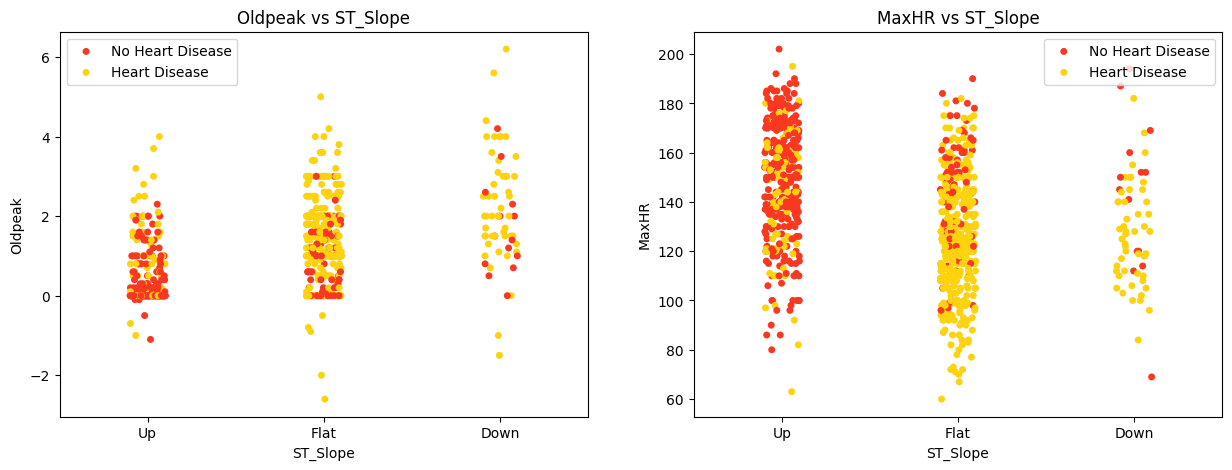

In [53]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

- Another crystal clear positive observation can be made about the positive correlation between ST_Slope value and Heart Disease cases.
- Flat, Down and Up in that order display high, middle and low probability of being diagnosed with heart diseases respectively.

#### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

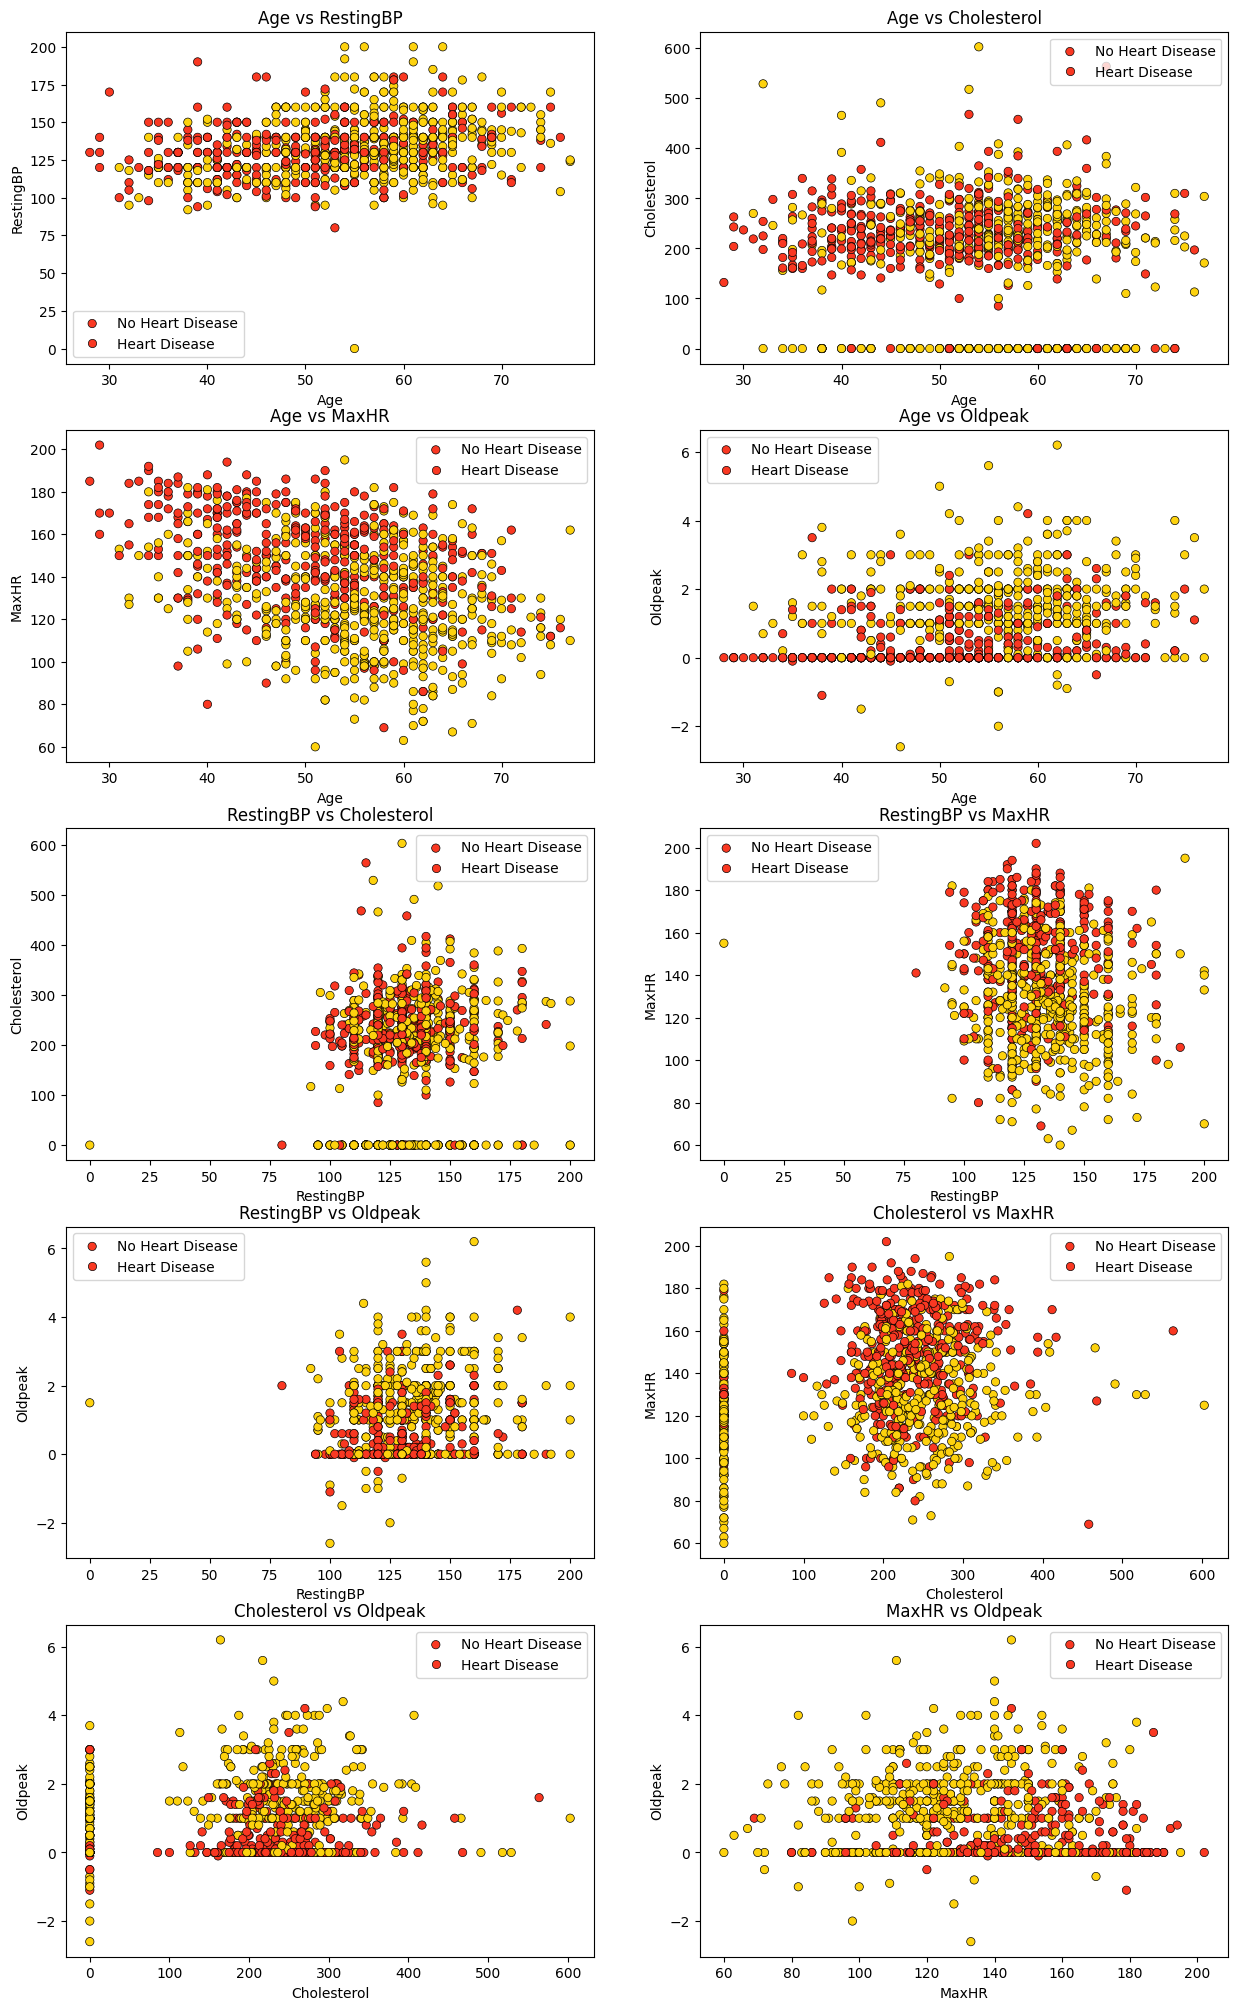

In [54]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'HeartDisease',palette = colors, edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- For age 50+, RestingBP between 100 - 175, Cholesterol level of 200 - 300,Max Heart Rate below 160 and positive oldpeak values displays high cases of heart disease.
- For RestingBP values 100 - 175, highlights too many heart disease patients for all the features.
- Cholesterol values 200 - 300 dominates the heart disease cases.
- Similarly, Max Heart Rate values below 140 has high probability of being diagnosed with heart diseases.

#### Summary of EDA
Order / Values of features for positive cases of heart disease :
- Categorical Features (Order) :

    - Sex : Male > Female
    - ChestPainType : ASY > NAP > ATA > TA
    - FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
    - RestingECG : Normal > ST > LVH
    - ExerciseAngina : Angina > No Angina
    - ST_Slope : Flat > Up > Down
- Numerical Features (Range) :

   -  Age : 50+
    - RestingBP : 95 - 170
    - Cholesterol : 160 - 340
    - MaxHR : 70 - 180
    - Oldpeak : 0 - 4
Now that we have understood the typical values of the features, we move on to the next step where we select the appropriate features for modeling!

In [8]:
# lets prepare the entity here , and if i open the config.yaml file where i can find the root_dir,status_file,unzip_data the same i do find in the class iside the DataValiadationConfig
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict # here all_Schema just read all the data and install inside the all_schema varaible as a dictionary formate

In [9]:
# in order to prepare my cofiguration manager in src config i need this below 2 packages 
from PROJECTML.constants import *
from PROJECTML.utils.common import read_yaml, create_directories

In [10]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath) # here iam reading these all like config,params,schema 
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

# then i will prepare my get_data_validation_config , so inside this iam returning all of the varaibles that i have deifined inside my entity 
    
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation  # after reading by config iam returning the root_dir,status_file etc one by one
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig( # the above entity code is return type , and the below varaibles are getting return after reading by config varaible 
            root_dir=config.root_dir, 
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir = config.unzip_data_dir,
            all_schema=schema,
        )

        return data_validation_config

In [11]:
import os
from PROJECTML import logger

In [14]:
import pandas as pd

class DataValiadtion: # this is components name 
    def __init__(self, config: DataValidationConfig): # it will take my DataValidationConfig
        self.config = config

# now iam below iam going to create validate_all_columns,this is a simple python program
    def validate_all_columns(self)-> bool:
        try:
            validation_status = None

            data = pd.read_csv(self.config.unzip_data_dir) # here iam reading the dataset
            all_cols = list(data.columns) # here iam list down all the columns,it will check or matches the schema.yaml file columns whether all the columns present in schema.yaml file columns  present or not 

            all_schema = self.config.all_schema.keys()

            # if those schema.yaml file columns are present it will return status as true, else it will returnt he status as false, then it will return one txt file inside the artifacts folder which theat txt file contains status decision true or false
            for col in all_cols:
                if col not in all_schema:
                    validation_status = False
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")
                else:
                    validation_status = True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")

            return validation_status
        
        except Exception as e:
            raise e

In [15]:
try:
    config = ConfigurationManager() # here iam initializing my configuration manager
    data_validation_config = config.get_data_validation_config() # here iam getting my get_data_validation_config
    data_validation = DataValiadtion(config=data_validation_config) # then iam calling my DataValidation class and passing data_validation_config inside it
    data_validation.validate_all_columns()
except Exception as e:
    raise e

[2024-02-25 19:18:01,043: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-02-25 19:18:01,045: INFO: common: yaml file: params.yaml loaded successfully]
[2024-02-25 19:18:01,050: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-02-25 19:18:01,055: INFO: common: created directory at: artifacts]
[2024-02-25 19:18:01,057: INFO: common: created directory at: artifacts/data_validation]
